**작성자** : 김종원 / **작성일자** : 2022.02.17

# 과제1. 직원 이직 분석

* 회사 인사팀에서는 AIVLER 들에게 직원의 이직여부과 관련해서 분석을 요청하였습니다.
* 최근 이직율이 증가하는 것에 대해 우려를 갖고 있기에, 이직여부에 영향을 주는 요인에 대해 분석하여, 직원들이 회사를 떠나지 않도록 인사 프로그램을 준비하려고 합니다.
* 필요하다면, 검색을 통해 '직원이 회사를 떠나는 이유' 등을 찾아보는 것은 데이터 분석을 하는데 도움이 될 것입니다.
* 자, 이제 인사팀에서 제공한 데이터를 바탕으로 각각 개별 변수의 분포를 살펴보며, 비즈니스 인사이트를 최대한 도출해 봅시다.


![](https://adoptostaging.blob.core.windows.net/media/employee-attrition-reasons-9LIqMv.jpg)

## 0.환경설정

### 1) 라이브러리 로딩

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm

In [6]:
import platform
import seaborn as sns 
from matplotlib import font_manager, rc 

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
else:
    print("Unknown system. sorry")

### 2) 데이터 로딩

In [7]:
# data data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_NA.CSV"
data = pd.read_csv(path)
data.drop(['EducationField', 'Education','JobInvolvement', 'StockOptionLevel', 'BusinessTravel','YearsWithCurrManager'
,'YearsInCurrentRole','JobRole', 'Department','EmployeeNumber','EnvironmentSatisfaction','TrainingTimesLastYear','YearsAtCompany']
          , axis = 1, inplace = True)
data['Attrition'] = np.where(data['Attrition']=='Yes', 1, 0)
data.head(10)

,Attrition,Age,DistanceFromHome,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance
0,0,33,7.0,Male,3,Married,11691,0.0,No,11,4,14,4
1,0,35,18.0,Male,4,Single,9362,2.0,No,11,3,10,3
2,0,42,6.0,Male,1,Married,13348,9.0,No,13,2,18,4
3,0,46,2.0,Female,1,Married,17048,8.0,No,23,1,28,3
4,0,39,NaN,Male,4,Divorced,4127,2.0,No,18,4,7,3
5,1,22,4.0,Male,3,Single,3894,5.0,No,16,3,4,3
6,0,24,21.0,Male,1,Divorced,2296,0.0,No,14,2,2,3
7,0,34,8.0,Male,3,Married,4404,2.0,No,12,1,6,4
8,0,30,20.0,Male,1,Married,9957,0.0,No,15,3,7,2
9,0,26,6.0,Female,4,Married,2659,1.0,Yes,13,3,3,3


|	구분	|	변수 명	|	내용	|	type	|	비고	|
|	----	|	----	|	----	|	----	|	----	|
|	**Target**	|	**Attrition**	|	이직여부, Yes , No	|	범주	| 1- 이직, 0- 잔류		|
|	feature	|	Age	|	나이	|	숫자	|		|
|	feature	|	DistanceFromHome	|	집-직장 거리	|	숫자	|	마일	|
|	feature	|	Gender	|	성별	|	범주	| Male, Female		|
|	feature	|	JobSatisfaction	|	직무 만족도	|	범주	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	feature	|	MaritalStatus	|	결혼상태	|	범주	| Single, Married, Divorced		|
|	feature	|	MonthlyIncome	|	월급	|	숫자	| 달러	|
|	feature	|	NumCompaniesWorked	|	입사 전 근무한 회사 수	|	숫자	|	0 - 우리회사가 첫 직장	|
|	feature	|	RelationshipSatisfaction	|	동료와의 관계	|	범주	| 1 Low, 2 Medium, 3 High, 4 Very High		|
|	feature	|	OverTime	|	야근여부	|	범주	|	Yes, No	|
|	feature	|	PercentSalaryHike	|	전년대비 급여인상율	|	숫자	|	%	|
|	feature	|	TotalWorkingYears	|	총 경력 연수	|	숫자	|		|
|	feature	|	WorkLifeBalance	|	워라밸. 일-삶 균형도	|	범주	|	1 Bad, 2 Good, 3 Better, 4 Best	|

----

## 1.가설수립

* 여기서는 가설을 생략합니다.

----

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ NaN 존재 여부 및 조치 방안  

④ 기초통계량  

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.
* (옵션)자료에 대한 가정 검정.(정규성, 등분산성 등)

### (1) 범주형 Feature --> Target
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 교차표(pd.crosstab())  
    ② 시각화( Stacked Bar, Mosaic)  
    ③ 가설검정(카이제곱검정)
* 각 feature 별로 관계의 정도를 3가지로 정리해봅시다. 

#### 1) Gender --> Attrtion

In [8]:
feature = 'Gender'

① 교차표(pd.crosstab())

In [9]:
table = pd.crosstab(data["Attrition"],data[feature], normalize="columns")
display(table)

Gender,Female,Male
Attrition,,
0,0.859184,0.827632
1,0.140816,0.172368


② 시각화( Stacked Bar, Mosaic)

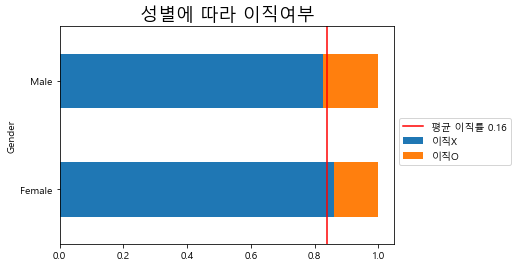

In [10]:
table = pd.crosstab(data[feature], data["Attrition"], normalize = 'index')
table.plot.barh(stacked=True)
plt.axvline(1-data['Attrition'].mean(), color = 'r')
plt.title("성별에 따라 이직여부",size= 18)
plt.legend(labels= [f"평균 이직률 {data['Attrition'].mean():.2f}",'이직X','이직O'],
           bbox_to_anchor=(1, 0.6))
plt.show()

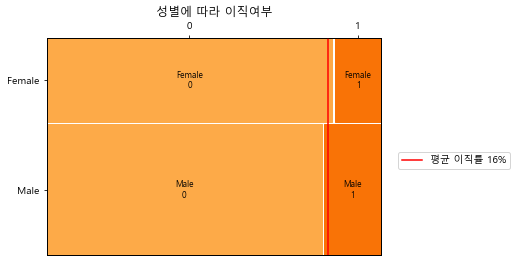

In [11]:
# 모자익 그래프의 색상 설정.
props = {}
props[('Female', '1')] = {'color': 'xkcd:orange'}
props[('Female','0')] = {'color': 'xkcd:light orange'}
props[('Male', '1')] = {'color': 'xkcd:orange'}
props[('Male','0')] = {'color': 'xkcd:light orange'}


mosaic(data.sort_values([feature,'Attrition'],
       ascending=[False,True]), 
       [feature,'Attrition'],
       gap=0.01,
       title='성별에 따라 이직여부',
       properties=props, 
       horizontal=False , 
       axes_label=True
      )

plt.axvline(1- data['Attrition'].mean(), color = 'r')
plt.legend([f"평균 이직률 {data['Attrition'].mean() * 100:.0f}%"], bbox_to_anchor=(1.4, 0.5))

plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 1차 분석 결과

    성비에 따라 이직여부는 큰 차이로 보이지 않는다. 하지만 여성이 남성에 비해 상대적으로 이직을 하지 않는 것을 알 수 있다.

③ 가설검정(카이제곱검정)

In [12]:
table = pd.crosstab(data["Attrition"],data[feature])

# 카이제곱검정
result = spst.chi2_contingency(table)
print(f'카이제곱통계량 {result[0]:.5f}  p-value : {result[1]}')

카이제곱통계량 1.97825  p-value : 0.15957492990528155


* 2차 분석 결과
    
    p_value(유의확률)이 유의수준 5%보다 크기에 대립가설인 성별에 따라 이직 여부의 차이가 있다 라는 가설을 기각하고 귀무가설인 성별에 따라 이직 여부의 차이가 없다. 라는 가설을 채택합니다.

④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

* 최종 3차 분석 결과
    
    성별에 따라 이직여부의 차이가 있다. 라는 가설이 카이제곱 통계량에 p_value로 인해 기각되었고, 시각화된 결과를 보았을때도 성별에 따라 이직여부의 차이가 크게 발생하지 않기에 성별에 따라 이직여부는 차이가 없다 라고 도출하였습니다.

#### 2) MaritalStatus --> Attrtion

In [13]:
feature = 'MaritalStatus'

① 교차표(pd.crosstab())

In [14]:
table = pd.crosstab(data["Attrition"],data[feature], normalize="columns")
display(table)

MaritalStatus,Divorced,Married,Single
Attrition,,,
0,0.916667,0.878947,0.732673
1,0.083333,0.121053,0.267327


② 시각화( Stacked Bar, Mosaic)

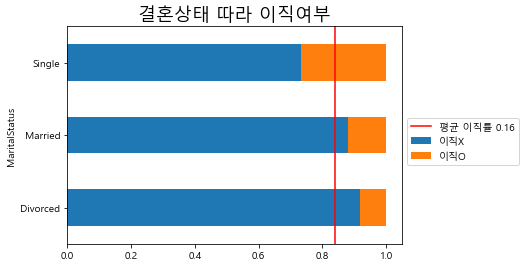

In [15]:
table = pd.crosstab(data[feature], data["Attrition"], normalize = 'index')
table.plot.barh(stacked=True)
plt.axvline(1-data['Attrition'].mean(), color = 'r')
plt.title("결혼상태 따라 이직여부",size= 18)
plt.legend(labels= [f"평균 이직률 {data['Attrition'].mean():.2f}",'이직X','이직O'],
           bbox_to_anchor=(1, 0.6))
plt.show()

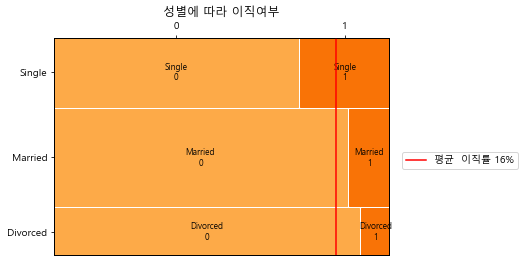

In [16]:
# 모자익 그래프의 색상 설정.
props = {}
props[('Single', '1')] = {'color': 'xkcd:orange'}
props[('Single','0')] = {'color': 'xkcd:light orange'}
props[('Married', '1')] = {'color': 'xkcd:orange'}
props[('Married','0')] = {'color': 'xkcd:light orange'}
props[('Divorced', '1')] = {'color': 'xkcd:orange'}
props[('Divorced','0')] = {'color': 'xkcd:light orange'}

mosaic(data.sort_values([feature,'Attrition'],
       ascending=[True,True]), 
       [feature,'Attrition'],
       gap=0.01,
       title='성별에 따라 이직여부',
       properties=props, 
       horizontal=False , 
       axes_label=True
      )

plt.axvline(1- data['Attrition'].mean(), color = 'r')

plt.legend([f"평균  이직률 {data['Attrition'].mean() * 100:.0f}%"], bbox_to_anchor=(1.4, 0.5))
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 1차 분석 결과

    싱글일때 이직을 많이하고 결혼했을때 이직율이 평균에 비해 떨어지며 이혼을 하였을때는 이직율이 결혼한 상태에 비해 떨어지는 것으로 보여진다.

    이것으로 결혼상태에 따라 이직여부가 차이가 있는것으로 보여진다. 하지만 눈으로 본 결과이기에 통계적검증을 통해 수치화된 결과로 결혼 상태에 따라 이직여부가 차이가 발생하는 것인지 파악하도록 하겠습니다.
    
    

③ 가설검정(카이제곱검정)

In [17]:
table = pd.crosstab(data["Attrition"],data[feature])

# 카이제곱검정
result = spst.chi2_contingency(table)
print(f'카이제곱통계량 {result[0]:.5f}  p-value : {result[1]}')

카이제곱통계량 53.12936  p-value : 2.9047385436211595e-12


* 2차 분석 결과
    
    p_value(유의 확률)가 유의수준 0.05보다 작기에 귀무가설을 기각하고 대립가설인 "결혼 상태에 따른 이직 여부에 차이가 있다"라는 가설을 채택합니다.

④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

* 최종 3차 분석 결과
    
   결혼상태에 따라 이직여부의 차이가 있다. 라는 가설이 통계적 검증을 통해 p_value가 유의수준 0.05 보다 작기에 귀무가설을 기각하고 대립가설인 "결혼 상태에 따른 이직 여부에 차이가 있다" 라는 대립가설을 채택하였기에, `결혼상태가 이직여부에 영향을 끼친다는 분석 결과를 도출할 수 있겠습니다.`

#### 3) JobSatisfaction --> Attrtion

In [18]:
feature = 'JobSatisfaction'

① 교차표(pd.crosstab())

In [19]:
table = pd.crosstab(data["Attrition"],data[feature], normalize="columns")
display(table)

JobSatisfaction,1,2,3,4
Attrition,,,,
0,0.788,0.834043,0.836957,0.879093
1,0.212,0.165957,0.163043,0.120907


② 시각화( Stacked Bar, Mosaic)

* Stacked Bar

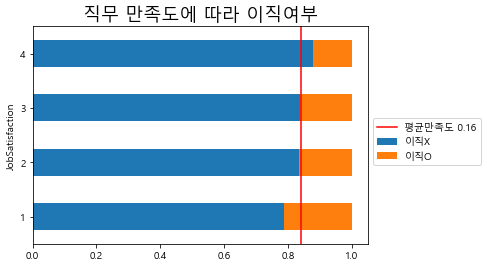

In [20]:
table = pd.crosstab(data[feature], data["Attrition"], normalize = 'index')
table.plot.barh(stacked=True)
plt.axvline(1-data['Attrition'].mean(), color = 'r')
plt.title("직무 만족도에 따라 이직여부",size= 18)
plt.legend(labels= [f"평균만족도 {data['Attrition'].mean():.2f}",'이직X','이직O'],
           bbox_to_anchor=(1, 0.6))
plt.show()

* Mosaic

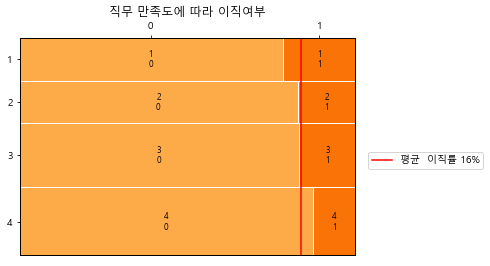

In [21]:
# 모자익 그래프의 색상 설정.
props = {}
props[('1', '1')] = {'color': 'xkcd:orange'}
props[('1','0')] = {'color': 'xkcd:light orange'}
props[('2', '1')] = {'color': 'xkcd:orange'}
props[('2','0')] = {'color': 'xkcd:light orange'}
props[('3', '1')] = {'color': 'xkcd:orange'}
props[('3','0')] = {'color': 'xkcd:light orange'}
props[('4', '1')] = {'color': 'xkcd:orange'}
props[('4','0')] = {'color': 'xkcd:light orange'}

mosaic(data.sort_values([feature,'Attrition'],
       ascending=[False,True]), 
       [feature,'Attrition'],
       gap=0.01,
       title='직무 만족도에 따라 이직여부',
       properties=props, 
       horizontal=False , 
       axes_label=True
      )

plt.axvline(1- data['Attrition'].mean(), color = 'r')

plt.legend([f"평균  이직률 {data['Attrition'].mean() * 100:.0f}%"], bbox_to_anchor=(1.4, 0.5))
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 1차 분석 결과

    만족도가 1일때 이직여부가 평균 이직률보다 크고, 만족도가 4일때 평균 이직률 보다 작다. 하지만 만족도 2와 3은 평균이직률과 유사하다. 이를 통해 직무 만족도에 따라 이직여부의 차이가 있는 것으로 판단되고, 만족도 2와 3인경우 평균 이직률이 비슷하기에 두개의 값을 하나로 묶어서 표현하는게 좋아보입니다.
    

③ 가설검정(카이제곱검정)

In [22]:
table = pd.crosstab(data["Attrition"],data[feature])

# 카이제곱검정
result = spst.chi2_contingency(table)
print(f'카이제곱통계량 {result[0]:.5f}  p-value : {result[1]}')

카이제곱통계량 9.63151  p-value : 0.021972649369306214


* 2차 분석 결과

    p_value(유의 확률)가 유의수준 0.05보다 작기에 귀무가설을 기각하고 대립가설인 "직무 만족도에 따른 이직 여부에 차이가 있다" 가설을 채택하지만, 큰 차이가 있다고 보여지지 않기에, 바로 1차 분석 결과에서 도출된 정보를 가지고 데이터를 그룹핑을 하고자 합니다.

* 추가분석
    1. 데이터 그룹핑
    2. 이변량 분석

In [24]:
data.loc[data[feature] ==1, "JobSatisfaction_grop"] = 1
data.loc[data[feature] ==2, "JobSatisfaction_grop"] = 2
data.loc[data[feature] ==3, "JobSatisfaction_grop"] = 2
data.loc[data[feature] ==4, "JobSatisfaction_grop"] = 3

In [25]:
data["JobSatisfaction_grop"].isnull().sum()

0

* 시각화
    
    - Mosaic

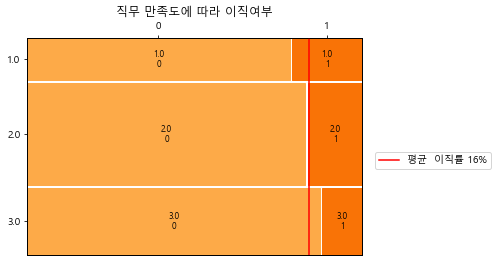

In [27]:
# 모자익 그래프의 색상 설정.
feature = "JobSatisfaction_grop"
props = {}
props[('1.0', '1')] = {'color': 'xkcd:orange'}
props[('1.0','0')] = {'color': 'xkcd:light orange'}
props[('2.0', '1')] = {'color': 'xkcd:orange'}
props[('2.0','0')] = {'color': 'xkcd:light orange'}
props[('3.0', '1')] = {'color': 'xkcd:orange'}
props[('3.0','0')] = {'color': 'xkcd:light orange'}

mosaic(data.sort_values([feature,'Attrition'],
       ascending=[False,True]), 
       [feature,'Attrition'],
       gap=0.01,
       title='직무 만족도에 따라 이직여부',
       properties=props, 
       horizontal=False , 
       axes_label=True
      )

plt.axvline(1- data['Attrition'].mean(), color = 'r')

plt.legend([f"평균  이직률 {data['Attrition'].mean() * 100:.0f}%"], bbox_to_anchor=(1.4, 0.5))
plt.show()

In [28]:
table = pd.crosstab(data["Attrition"],data[feature])

# 카이제곱검정
result = spst.chi2_contingency(table)
print(f'카이제곱통계량 {result[0]:.5f}  p-value : {result[1]}')

카이제곱통계량 9.62245  p-value : 0.008137869190485921


* 3차 분석 결과
    
    데이터를 재그룹핑을 하여 시각화하고 카이제곱 통계량을 구하여 통계적 검증을 하였지만 2차 분석때 나온 결과와 유사하며 p_value가 올라가게 된 결과를 알 수 있습니다. 하지만 p_value(유의 확률)가 유의수준 0.05보다 작기에 귀무가설을 기각하고 대립가설인 "직무 만족도에 따른 이직 여부에 차이가 있다" 가설을 채택하지만, 큰 차이가 있다고 보여지지 않습니다.

④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

* 최종 4차 분석 결과

    직무 만족도에 따른 이직여부의 차이가 크지 않게 있다고 결과를 도출하였습니다.

### (2) 숫자형 Feature --> target

* 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 그래프 : histogram, densityplot   
    ② 수치화 : 로지스틱회귀

#### 1) Age --> Attrtion


In [44]:
feature = 'Age'

① 그래프 : histogram, densityplot

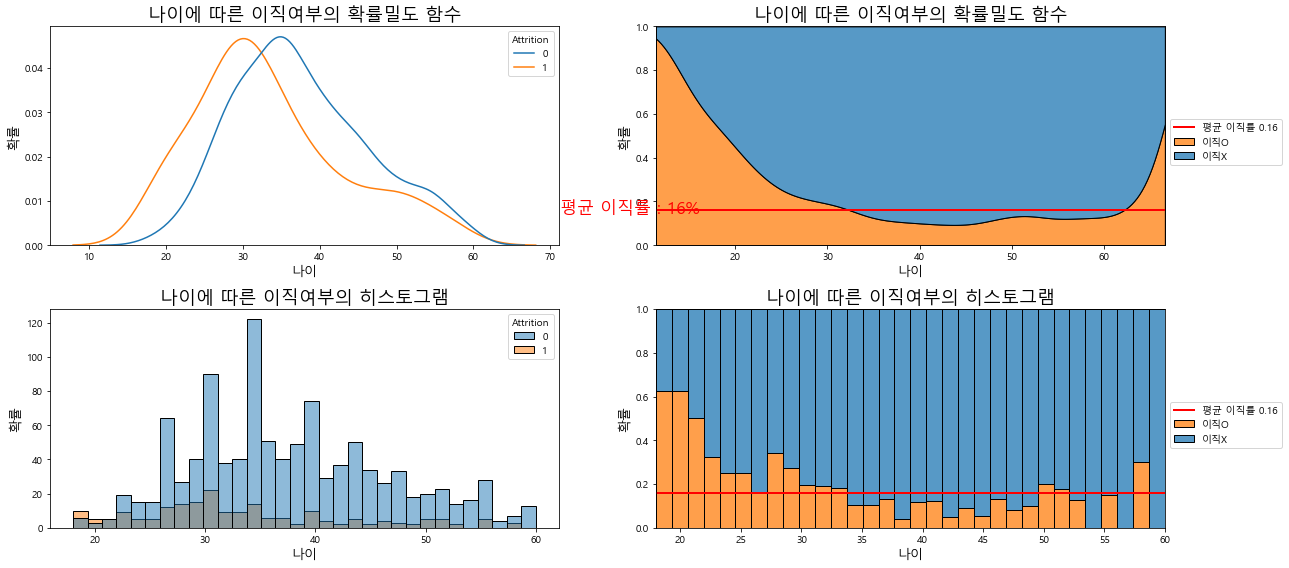

In [45]:
mean_val = data["Attrition"].mean()

plt.figure(figsize= (18,8))
plt.subplot(2,2,1)
sns.kdeplot(data = data, x= feature,hue="Attrition",common_norm=False)
plt.title("나이에 따른 이직여부의 확률밀도 함수",size= 18)
plt.ylabel("확률",size = 13)
plt.xlabel("나이",size = 13)


plt.subplot(2,2,2)
sns.kdeplot(data = data, x= feature, hue="Attrition", multiple='fill')
plt.axhline(mean_val,color='r',linewidth=2)
plt.text(1,0.15,f"평균 이직률 : {mean_val*100:.0f}%",color='r',size=17)

plt.title("나이에 따른 이직여부의 확률밀도 함수",size= 18)
plt.ylabel("확률",size = 13)
plt.xlabel("나이",size = 13)
plt.legend(labels= [f"평균 이직률 {mean_val:.2f}",'이직O','이직X'],bbox_to_anchor=(1.24, 0.6))


plt.subplot(2,2,3)
sns.histplot( data=data, x=feature , hue="Attrition", bins = 32)
plt.title("나이에 따른 이직여부의 히스토그램",size= 18)
plt.ylabel("확률",size = 13)
plt.xlabel("나이",size = 13)


plt.subplot(2,2,4)
sns.histplot( data=data, x=feature , hue="Attrition", bins = 32, multiple='fill')
plt.axhline(mean_val,color='r',linewidth=2)

plt.title("나이에 따른 이직여부의 히스토그램",size= 18)
plt.ylabel("확률",size = 13)
plt.xlabel("나이",size = 13)
plt.legend(labels= [f"평균 이직률 {mean_val:.2f}",'이직O','이직X'],bbox_to_anchor=(1, 0.6))

plt.tight_layout()
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 1차 분석 결과

    히스토그램과 밀도함수를 보았을때, 나이가 젊을 수록 이직율이 평균에 비해 높으며, 약 30대초반까지, 30대 후반 이후로는 이직률이 떨어진다. 아마 앞에서 분석한 결혼상태에 따라 이직률이 달라지는 것 처럼, 30대 이후에는 결혼을 하였기에 이직률이 떨어지는 것으로 추정된다. 하지만 50살에 이직을 하기에 이 시기에는 정년 퇴직을 하기 전 이직을 한것으로 추정된다.

② 수치화 : 로지스틱회귀

In [40]:
# 로지스틱 모형을 만들고 통계량을 구해 봅시다.
model = sm.Logit(data['Attrition'], data[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.424660
         Iterations 5
Age    4.667821e-100
dtype: float64


* 2차 분석결과

    로지스틱 회귀모델을 통해 나이에 따른 이직여부에 대한 관련이 있는지 구해봤는데, p_value가 0.05보다 작기에 나이에 따른 이직여부가 관련이 있다고 판단되었습니다.

③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

* 최종 3차 분석 결과

    히스토그램과 밀도함수를 시각화하였을때, 나이에 따른 이직여부의 차이가 두드러지게 보여졌다. 이것을 로지스틱 회귀모델을 통해 수치화 하였을때, p_value가 0.05보다 작기에 나이에 따른 이직여부가 달라진다 라고 결과를 도출할 수 있겠습니다. 추가적으로 나이대가 30대 초반 전 후 기준으로 나이를 구분하여 이직여부를 분석해도 좋을 것으로 판단됩니다.

#### 2) DistanceFromHome --> Attrtion


In [52]:
feature = 'DistanceFromHome'

* nan값 유무

In [60]:
data[feature].isnull().sum()

0

In [59]:
data[feature].fillna(data[feature].mean(),inplace=True)

Nan값이 54개가 있어서 해당 값을 평균값으로 대치하였다.

① 그래프 : histogram, densityplot

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


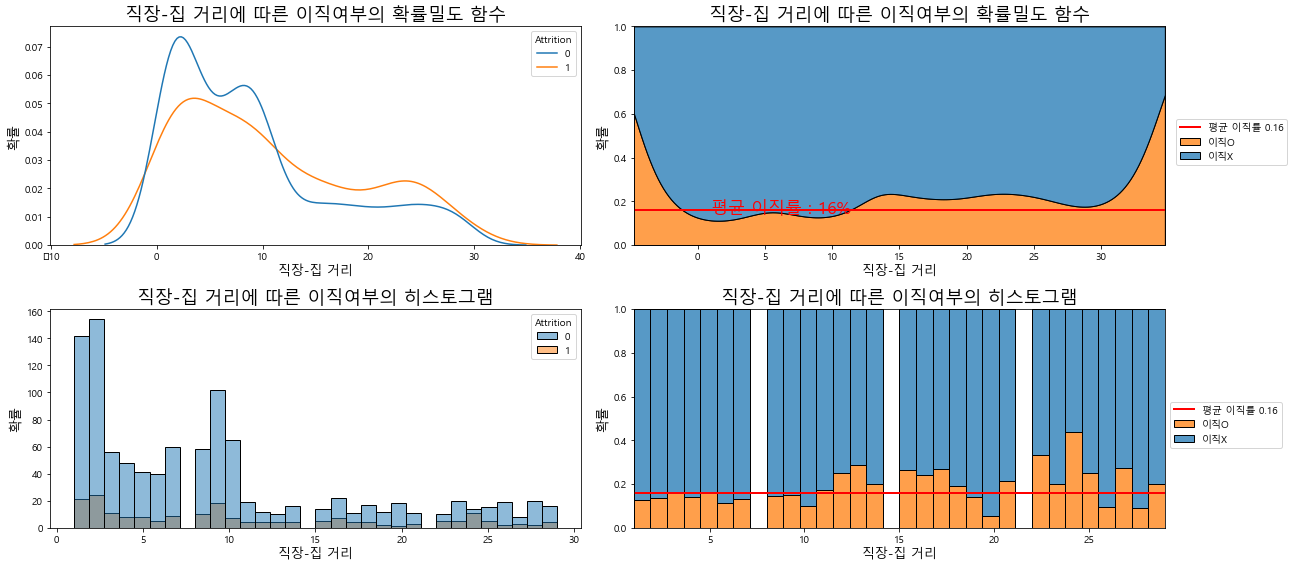

In [61]:
mean_val = data["Attrition"].mean()

plt.figure(figsize= (18,8))
plt.subplot(2,2,1)
sns.kdeplot(data = data, x= feature,hue="Attrition",common_norm=False)
plt.title("직장-집 거리에 따른 이직여부의 확률밀도 함수",size= 18)
plt.ylabel("확률",size = 13)
plt.xlabel("직장-집 거리",size = 13)


plt.subplot(2,2,2)
sns.kdeplot(data = data, x= feature, hue="Attrition", multiple='fill')
plt.axhline(mean_val,color='r',linewidth=2)
plt.text(1,0.15,f"평균 이직률 : {mean_val*100:.0f}%",color='r',size=17)

plt.title("직장-집 거리에 따른 이직여부의 확률밀도 함수",size= 18)
plt.ylabel("확률",size = 13)
plt.xlabel("직장-집 거리",size = 13)
plt.legend(labels= [f"평균 이직률 {mean_val:.2f}",'이직O','이직X'],bbox_to_anchor=(1.24, 0.6))


plt.subplot(2,2,3)
sns.histplot( data=data, x=feature , hue="Attrition", bins = 32)
plt.title("직장-집 거리에 따른 이직여부의 히스토그램",size= 18)
plt.ylabel("확률",size = 13)
plt.xlabel("직장-집 거리",size = 13)


plt.subplot(2,2,4)
sns.histplot( data=data, x=feature , hue="Attrition", bins = 32, multiple='fill')
plt.axhline(mean_val,color='r',linewidth=2)

plt.title("직장-집 거리에 따른 이직여부의 히스토그램",size= 18)
plt.ylabel("확률",size = 13)
plt.xlabel("직장-집 거리",size = 13)
plt.legend(labels= [f"평균 이직률 {mean_val:.2f}",'이직O','이직X'],bbox_to_anchor=(1, 0.6))

plt.tight_layout()
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 1차 분석결과
    
    히스토그램을 보았을때 직장과 집 거리가 멀 수록 이직율이 높아지는 것을 빈번히 볼수 있지만, 직장과 집의 거리가 멀다고 이직율이 높아진다고 시각화된 결과로 판단하기가 어렵다. 그렇기에 수치화를 통해 관련이 있는지 파악하겠습니다.

② 수치화 : 로지스틱회귀

In [62]:
# 로지스틱 모형을 만들고 통계량을 구해 봅시다.
model = sm.Logit(data['Attrition'], data[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.562055
         Iterations 6
DistanceFromHome    5.890702e-48
dtype: float64


* 2차 분석결과

    로지스틱 회귀모델을 통해 직장 집 거리에 따른 이직여부에 대한 관련이 있는지 구해봤는데, p_value가 0.05보다 작기에 직장 집 거리에 따른 이직여부가 관련이 있다고 판단되었습니다.

③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

* 최종 3차 분석 결과

    히스토그램과 밀도함수를 시각화하였을때, 직장 집 거리에 따른 이직여부의 차이가 두드러지게 보여진다고 판단할 수 없었기에, 로지스틱 회귀모델을 통해 p_value를 구해보았고, 해당 값이 0.05보다 작기에 집과 직장의 거리에 따른 이직여부가 관련이 있다고 판단되었습니다.

#### 3) MonthlyIncome --> Attrtion


In [63]:
feature = 'MonthlyIncome'

① 그래프 : histogram, densityplot

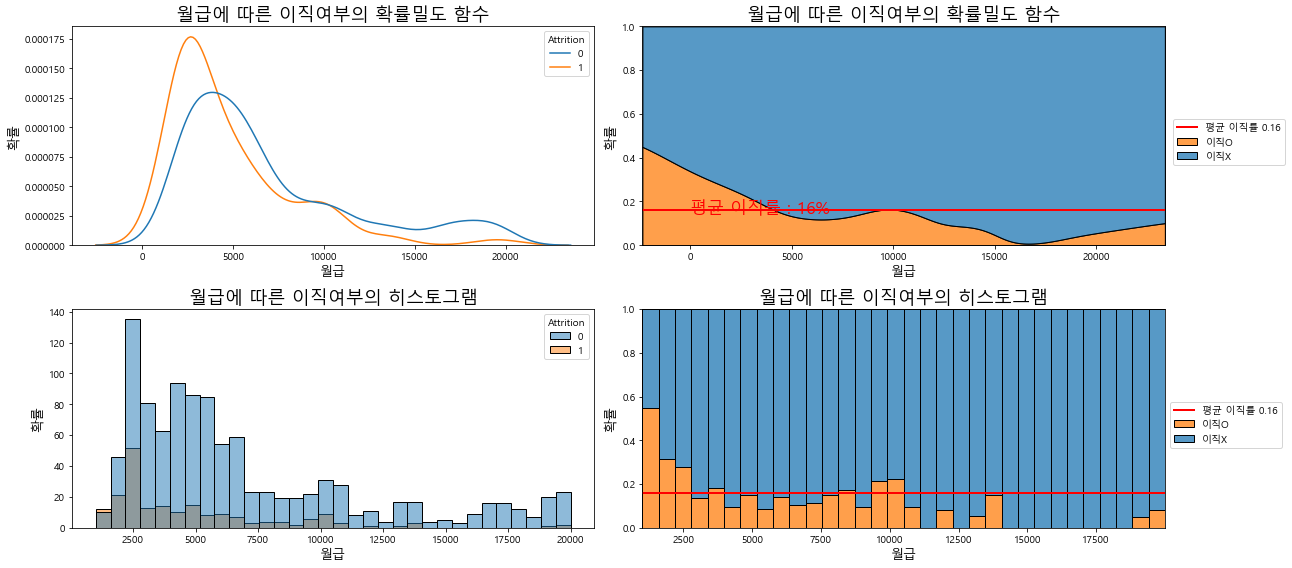

In [65]:
mean_val = data["Attrition"].mean()

plt.figure(figsize= (18,8))
plt.subplot(2,2,1)
sns.kdeplot(data = data, x= feature,hue="Attrition",common_norm=False)
plt.title("월급에 따른 이직여부의 확률밀도 함수",size= 18)
plt.ylabel("확률",size = 13)
plt.xlabel("월급",size = 13)


plt.subplot(2,2,2)
sns.kdeplot(data = data, x= feature, hue="Attrition", multiple='fill')
plt.axhline(mean_val,color='r',linewidth=2)
plt.text(1,0.15,f"평균 이직률 : {mean_val*100:.0f}%",color='r',size=17)

plt.title("월급에 따른 이직여부의 확률밀도 함수",size= 18)
plt.ylabel("확률",size = 13)
plt.xlabel("월급",size = 13)
plt.legend(labels= [f"평균 이직률 {mean_val:.2f}",'이직O','이직X'],bbox_to_anchor=(1.24, 0.6))


plt.subplot(2,2,3)
sns.histplot( data=data, x=feature , hue="Attrition", bins = 32)
plt.title("월급에 따른 이직여부의 히스토그램",size= 18)
plt.ylabel("확률",size = 13)
plt.xlabel("월급",size = 13)

plt.subplot(2,2,4)
sns.histplot( data=data, x=feature , hue="Attrition", bins = 32, multiple='fill')
plt.axhline(mean_val,color='r',linewidth=2)

plt.title("월급에 따른 이직여부의 히스토그램",size= 18)
plt.ylabel("확률",size = 13)
plt.xlabel("월급",size = 13)
plt.legend(labels= [f"평균 이직률 {mean_val:.2f}",'이직O','이직X'],bbox_to_anchor=(1, 0.6))

plt.tight_layout()
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

* 1차 분석 결과

    히스토그램이나 확률 밀도 함수를 보았을때, 월급이 낮을 수록 이직이 다른 월급에 비해 높은 것으로 보여진다.

② 수치화 : 로지스틱회귀

In [66]:
# 로지스틱 모형을 만들고 통계량을 구해 봅시다.
model = sm.Logit(data['Attrition'], data[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.437401
         Iterations 6
MonthlyIncome    1.922717e-71
dtype: float64


* 2차 분석결과

    로지스틱 회귀모델을 통해 월급에 따른 이직여부에 대한 관련이 있는지 구해봤는데, p_value가 0.05보다 작기에 월급에 따른 이직여부가 관련이 있다고 판단되었습니다.

③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

* 최종 3차 분석 결과

    히스토그램과 밀도함수를 시각화하였을때, 월급에 따른 이직여부의 차이가 보여졌고, 그 결과를 로지스틱 회귀모델을 통해 p_value를 구해보았을때, 해당 값이 0.05보다 작기에 월급에 따른 이직여부가 관련이 있다고 판단되었습니다. 또한 히스토그램을 보았을때 아에 이직이 없는 구간도 보여집니다. 그래서 추후 월급을 구간을 나눠서 마치 회사의 직급을 나누는 듯이 나눠서 살펴보면 재미있는 결과를 얻을 거라고 생각됩니다.

## 4.관계 정리

### 1) 강한관계의 변수

> 결혼상태, 나이, 월급

### 2) 중간관계의 변수

> 직원 만족도, 직장-집 거리, 

### 3) (거의)관계 없음

> 성별